In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_loan200 = pd.read_csv("loan200.csv")
df_loan200.head()

,outcome,payment_inc_ratio,dti
0,target,9.00000,22.50
1,default,5.46933,21.33
2,paid off,6.90294,8.97
3,paid off,11.14800,1.83
4,default,3.72120,10.81


In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(20)

In [6]:
X1 = df_loan200[["payment_inc_ratio", "dti"]].values
Y1 = df_loan200["outcome"].values
knn.fit(X1, Y1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [12]:
newloan = np.array([22.5, 9]).reshape(1, -1)
knn.predict(newloan)

array(['default'], dtype=object)

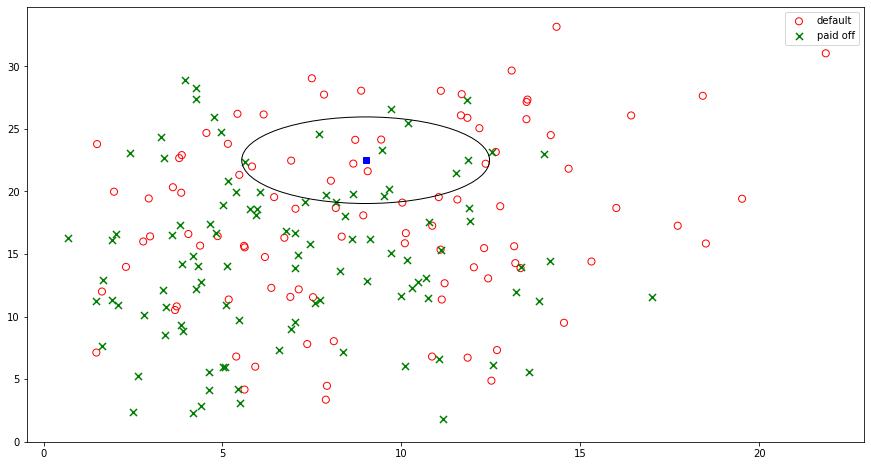

In [101]:
fig, ax = plt.subplots(figsize=(15, 8))

X1_def = df_loan200[df_loan200["outcome"]=="default"]
X1_pai = df_loan200[df_loan200["outcome"]=="paid off"]
ax.scatter(x = X1_def["payment_inc_ratio"], y=X1_def["dti"], facecolor='none', edgecolor='r' , s=50, label="default")
ax.scatter(x = X1_pai["payment_inc_ratio"], y=X1_pai["dti"], c="green", marker="x", s=50, label="paid off")
ax.plot(newloan[0][1], newloan[0][0], marker='s', color='blue')
ax.legend()

#ax.axis("equal")
circle = plt.Circle(np.flip(newloan[0]), radius=knn.kneighbors(np.flip(newloan))[0][0][-1], edgecolor='k', facecolor="none")
ax.add_artist(circle)

In [36]:
#from matplotlib import markers
#markers.MarkerStyle.


from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit_transform(df_loan200["house"])

In [104]:
df_loan = pd.read_csv("loan_data.csv")
df_loan.head()

,Unnamed: 0,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,...,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_,borrower_score
0,1,Charged Off,2500,60 months,30000,1.00,2.39320,1687,9.4,car,...,1,1,3,4.8,default,1,major_purchase,RENT,> 1 Year,0.65
1,2,Charged Off,5600,60 months,40000,5.55,4.57170,5210,32.6,small_business,...,1,1,11,1.4,default,5,small_business,OWN,> 1 Year,0.80
2,3,Charged Off,5375,60 months,15000,18.08,9.71600,9279,36.5,other,...,1,1,2,6.0,default,1,other,RENT,> 1 Year,0.60
3,4,Charged Off,9000,36 months,30000,10.08,12.21520,10452,91.7,debt_consolidation,...,1,1,4,4.2,default,1,debt_consolidation,RENT,> 1 Year,0.50
4,5,Charged Off,10000,36 months,100000,7.06,3.90888,11997,55.5,other,...,1,1,14,5.4,default,4,other,RENT,> 1 Year,0.55


In [123]:
X2 = df_loan[["payment_inc_ratio", "dti", "revol_bal", "revol_util"]][1:]
Y2 = df_loan["outcome"][1:]

In [124]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [125]:
knn1 = KNeighborsClassifier(5)
knn1.fit(X2.values, Y2.values)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [126]:
newloan = np.array([2.3932, 1, 1687, 9.4]).reshape(1, -1) 
knn1.predict(newloan)

array(['paid off'], dtype=object)

In [127]:
X2.iloc[knn1.kneighbors(newloan)[1][0]]

,payment_inc_ratio,dti,revol_bal,revol_util
35536,1.47212,1.46,1686,10.0
33651,3.38178,6.37,1688,8.4
25863,2.36303,1.39,1691,3.5
42953,1.28160,7.14,1684,3.9
43599,4.12244,8.98,1684,7.2


In [134]:
X2_t = ss.fit_transform(X2)
knn2 = KNeighborsClassifier(5)
knn2.fit(X2_t, Y2.values)
newloan = np.array([2.3932, 1, 1687, 9.4]).reshape(1, -1) 
knn2.predict(ss.transform(newloan))

array(['paid off'], dtype=object)

In [136]:
X2.iloc[knn2.kneighbors(ss.transform(newloan))[1][0]]

,payment_inc_ratio,dti,revol_bal,revol_util
2080,2.61091,1.03,1218,9.7
1438,2.34343,0.51,278,9.9
30215,2.71200,1.34,1075,8.5
28542,2.39760,0.74,2917,7.4
44737,2.34309,1.37,488,7.2
